## load_linnerud

In [1]:
from sklearn import tree
from sklearn import datasets
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = datasets.load_linnerud()

In [3]:
print(data.keys())
for f in data.keys():
    t = type(data[f])
    print('key: {}, type: {}'.format(f, t))
    if t == np.ndarray:
        print('shape: {}'.format(data[f].shape))

dict_keys(['feature_names', 'target_filename', 'data', 'target', 'target_names', 'data_filename', 'DESCR'])
key: feature_names, type: <class 'list'>
key: target_filename, type: <class 'str'>
key: data, type: <class 'numpy.ndarray'>
shape: (20, 3)
key: target, type: <class 'numpy.ndarray'>
shape: (20, 3)
key: target_names, type: <class 'list'>
key: data_filename, type: <class 'str'>
key: DESCR, type: <class 'str'>


In [4]:
print(data.DESCR)

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset constains two small dataset:

- *physiological* - CSV containing 20 observations on 3 exercise variables:
   Weight, Waist and Pulse.

- *exercise* - CSV containing 20 observations on 3 physiological variables:
   Chins, Situps and Jumps.

.. topic:: References

  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris: Editions Technic.



In [7]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['Weight'] = data.target[:, 0]
df['Waist'] = data.target[:, 1]
df['Pulse'] = data.target[:, 2]

In [8]:
df.head()

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0


In [9]:
df.tail()

,Chins,Situps,Jumps,Weight,Waist,Pulse
15,12.0,210.0,120.0,202.0,37.0,62.0
16,4.0,60.0,25.0,176.0,37.0,54.0
17,11.0,230.0,80.0,157.0,32.0,52.0
18,15.0,225.0,73.0,156.0,33.0,54.0
19,2.0,110.0,43.0,138.0,33.0,68.0


In [10]:
df.describe()

,Chins,Situps,Jumps,Weight,Waist,Pulse
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,9.450000,145.550000,70.30000,178.600000,35.400000,56.100000
std,5.286278,62.566575,51.27747,24.690505,3.201973,7.210373
min,1.000000,50.000000,25.00000,138.000000,31.000000,46.000000
25%,4.750000,101.000000,39.50000,160.750000,33.000000,51.500000
50%,11.500000,122.500000,54.00000,176.000000,35.000000,55.000000
75%,13.250000,210.000000,85.25000,191.500000,37.000000,60.500000
max,17.000000,251.000000,250.00000,247.000000,46.000000,74.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
Chins     20 non-null float64
Situps    20 non-null float64
Jumps     20 non-null float64
Weight    20 non-null float64
Waist     20 non-null float64
Pulse     20 non-null float64
dtypes: float64(6)
memory usage: 1.0 KB


In [12]:
print(df.isnull().sum())

Chins     0
Situps    0
Jumps     0
Weight    0
Waist     0
Pulse     0
dtype: int64


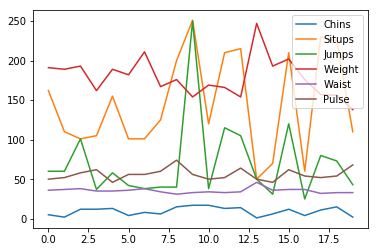

In [13]:
df.plot()

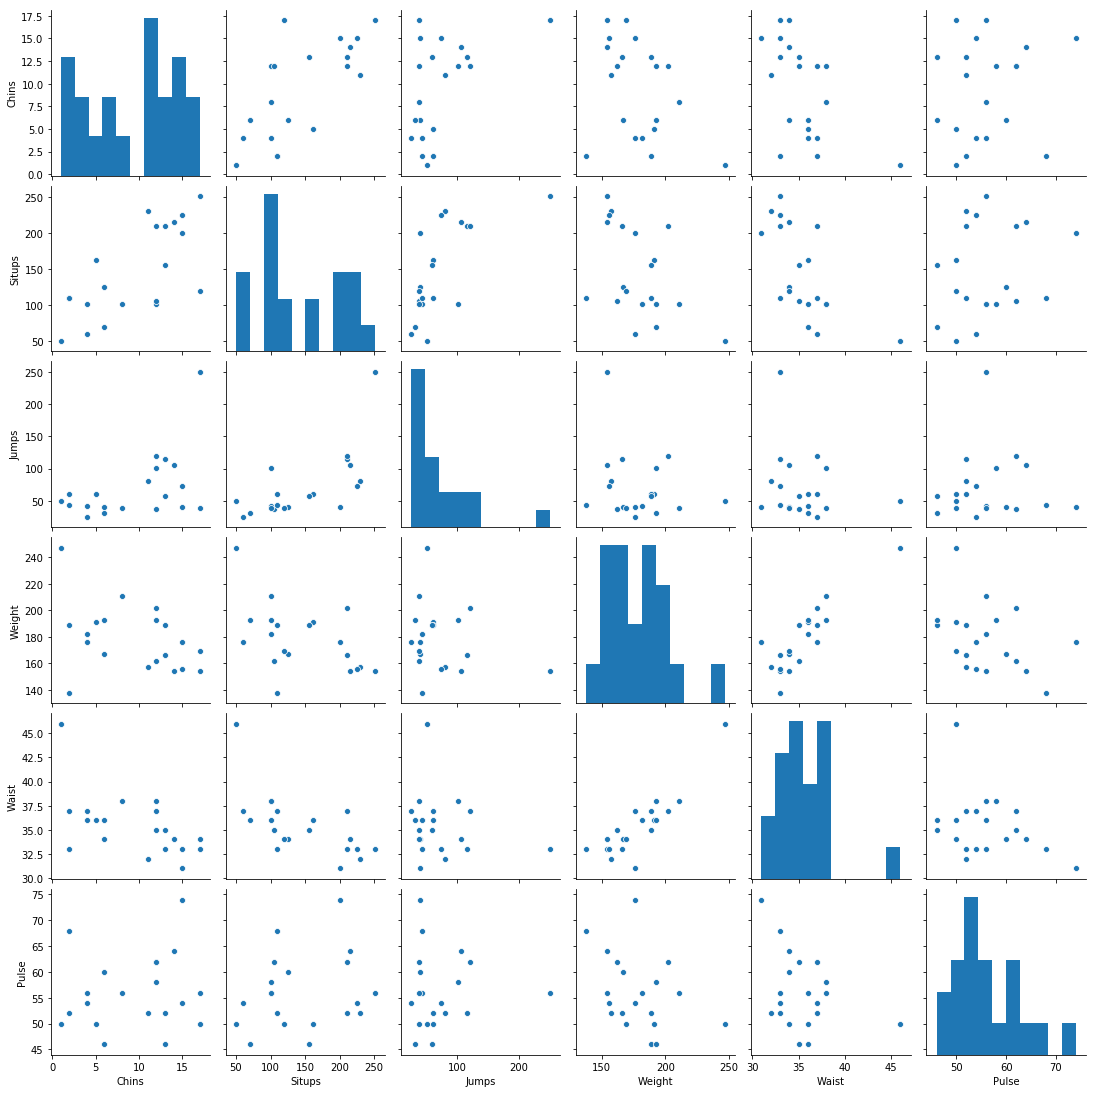

In [14]:
sns.pairplot(df)

In [15]:
X_train = data.data
y_train = data.target

In [16]:
model = tree.DecisionTreeRegressor()

In [17]:
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [18]:
y = model.predict(X_train)

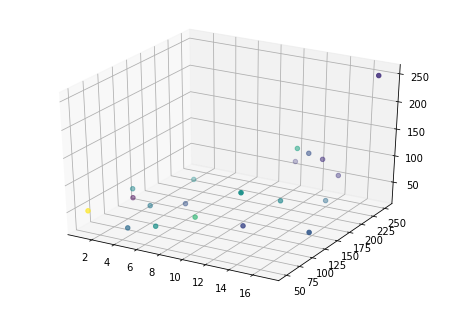

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D 

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_train[:,0], X_train[:,1], X_train[:,2], c = y[:,0])
plt.show()

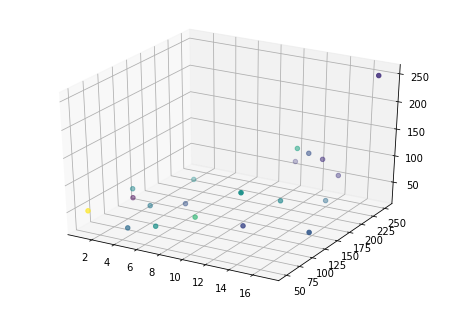

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D 

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_train[:,0], X_train[:,1], X_train[:,2], c = y_train[:,0])
plt.show()

In [21]:
print(model.score(X_train, y_train))

1.0


/usr/local/lib/python3.5/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
